# Test Case 2: Currents parralel to sailing direction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Energy_Calculation_Test import Energy

### Project Data & Flow Field

In [2]:
x = np.linspace(-50, 0, 1000)                  #x-coordinates of sailing route, cross-shore
y = np.linspace(0, 0, 1000)                    #y-coordinates of sailing route, alongshore
depth = np.linspace(50, 15, 1000)              #Depth corresponding to x,y-coordinates

#Vessel properties
ship_properties = {"P": 10000,                 #Desired constant power of vessel [kW]
                   "T": 13,                    #Draft of vessel [m]
                   "L": 159,                   #Length at waterline [m]
                   "B": 32,                    #Breadth [m]
                   "A": 22.5,                  #Rudder area [m^2]
                   "P_installed": 25000,       #Total installed power [kW]
                   "C_B": 0.85,                #Block coefficient [-]
                   "x0": 1,                    #number of propellor screws [-]     
                   "N": 0.0028                 #Vertical eddy viscosity [m^2/s]
                  }

### Define flow field and add to class

In [3]:
def flow_field(self):
    u = -1 * np.ones(1000)                     #Cross-shore current, positive in x-direction, corresponding to x,y-coordinates
    v = np.zeros(1000)                         #Alongshore current, positive in y-direction, corresponding to x,y-coordinates

    return u, v

Energy.flow_field = flow_field

### Plan view of data

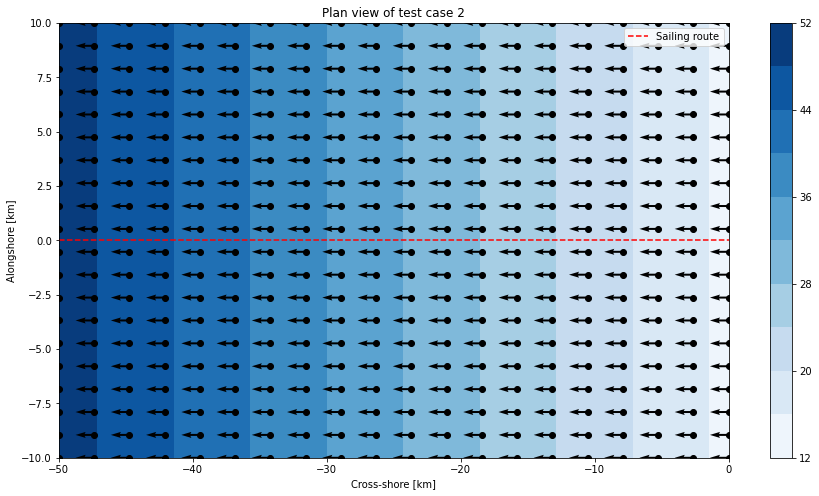

In [4]:
x_grid = np.linspace(-50, 0, 20)
y_grid = np.linspace(-10, 10, 20)

x_grid, y_grid = np.meshgrid(x_grid, y_grid)

contour = np.linspace(50, 15, 20)
depth_contour = []

for i in range(len(x_grid)):
    depth_contour.append(contour)

u_grid = -1 * np.ones(x_grid.size)
v_grid = np.zeros(x_grid.size)

plt.figure(figsize=(15, 8))
plt.plot(x_grid, y_grid, 'ko')
plt.plot(x, y, label='Sailing route', color='r', linestyle='--')
cp = plt.contourf(x_grid, y_grid, depth_contour, levels=10, cmap='Blues')
plt.colorbar(cp)
plt.quiver(x_grid, y_grid, u_grid, v_grid)
plt.xlabel('Cross-shore [km]')
plt.ylabel('Alongshore [km]')
plt.title('Plan view of test case 2')
plt.legend();

### Creating object and importing corresponding velocities and drift angles

Class "Energy" has 5 input variables:
- The x and y coordinates
- Depth corresponding to the x and y coordinates 
- A dictionary containing ship_properties as above

It has five methods:
- The standard __init__ method
- The Holtrop and Mennen method (Energy.HM(self, V, depth, angle), returns the Total Power, Total Resistance and HM Resistance
- The drag method (Energy.Drag(self, V, angle), returns the Drag Resistance
- The drift angle method (Energy.find_drift_angle(self, depth, u, v, V), returns the drift angle
- The velocity and drift angle method (Energy.solve_velocity_drift(self, depth, u, v), returns the velocity and drift angle  for a desired constant power, depth, and velocity field. This method uses the bisection method algorithm to calculate the velocity and drift angle that are both dependent on eachother. 

In [5]:
Energy_object = Energy(x, y, depth, ship_properties)

velocity, drift_angle, speed_overground, time = Energy_object.solve_velocity_drift(starting_time=0)

C:\ProgramData\anaconda3\envs\Thesis\lib\site-packages\Energy_Calculation_Test.py:203: RuntimeWarning: divide by zero encountered in double_scalars
  R_B = 0.11 * np.exp(-3 * P_B**-2) * F_ni**3 * A_BT**1.5 * rho * g / (1 + F_ni**2)


Text(0, 0.5, 'Drift angle [°]')

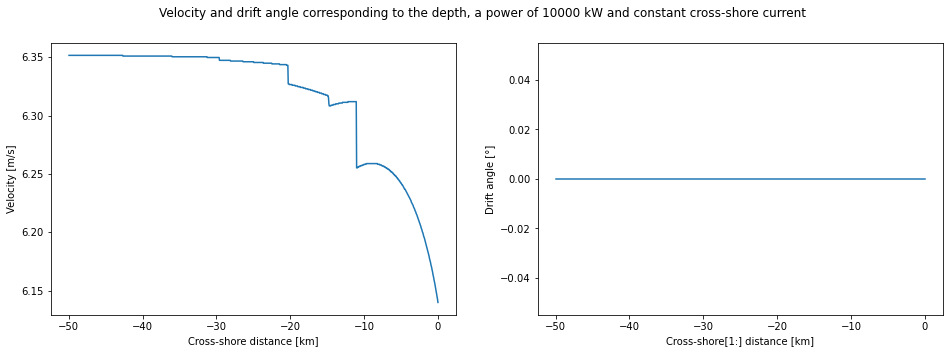

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

fig.suptitle(f'Velocity and drift angle corresponding to the depth, a power of {ship_properties["P"]} kW and constant cross-shore current')

ax1.plot(x[1:], velocity)
ax1.set_xlabel('Cross-shore distance [km]')
ax1.set_ylabel('Velocity [m/s]')

ax2.plot(x[1:], drift_angle)
ax2.set_xlabel('Cross-shore[1:] distance [km]')
ax2.set_ylabel('Drift angle [\xb0]')

### Plotting results

C:\ProgramData\anaconda3\envs\Thesis\lib\site-packages\Energy_Calculation_Test.py:203: RuntimeWarning: divide by zero encountered in double_scalars
  R_B = 0.11 * np.exp(-3 * P_B**-2) * F_ni**3 * A_BT**1.5 * rho * g / (1 + F_ni**2)


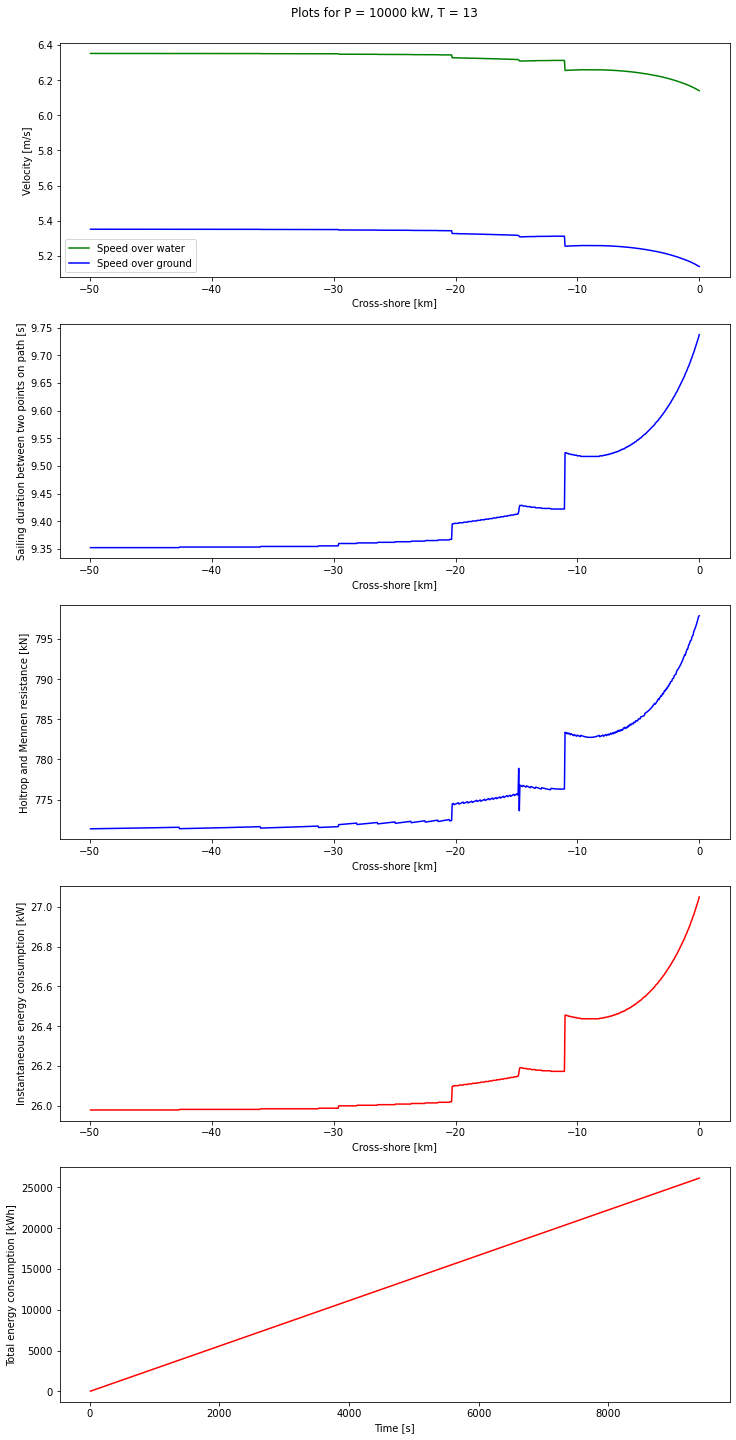

In [7]:
#Calculating sailing duration, resistance and energy consumption:
P = ship_properties["P"]
T = ship_properties["T"]

resistance = []
energy = []
duration = []

for i in range(len(x) - 1):
    sailing_duration = ((x[i+1] - x[i]) * 1000) / speed_overground[i]
    duration.append(sailing_duration)
    resistance.append(Energy_object.HM(velocity[i], depth[i], drift_angle[i])[1] / 1000)
    energy.append(P * sailing_duration / (60 * 60))
    
total_duration = [sum(duration[:i+1]) for i in range(len(duration))]
total_energy = [sum(energy[:i+1]) for i in range(len(energy))]

#Plotting the results
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(12, 25))
fig.suptitle(f'Plots for P = {P} kW, T = {T}', y=0.9)

# Plot the velocity over time
ax1.plot(x[1:], velocity, color='g', label ='Speed over water')
ax1.plot(x[1:], speed_overground, color='b', label='Speed over ground')
ax1.set_xlabel('Cross-shore [km]')
ax1.set_ylabel('Velocity [m/s]')
ax1.legend()

# Plot sailing duration between two consecutive x,y coordinates
ax2.plot(x[1:], duration, color='b')
ax2.set_xlabel('Cross-shore [km]')
ax2.set_ylabel('Sailing duration between two points on path [s]')

# Plot the Holtrop and Mennen resistance over time
ax3.plot(x[1:], resistance, color='b')
ax3.set_xlabel('Cross-shore [km]')
ax3.set_ylabel('Holtrop and Mennen resistance [kN]')

#plot instantaneous energy consumption per hour
ax4.plot(x[1:], energy, color='r')
ax4.set_xlabel('Cross-shore [km]')
ax4.set_ylabel('Instantaneous energy consumption [kW]')

#plot total energy consumption
ax5.plot(total_duration, total_energy, color='r')
ax5.set_xlabel('Time [s]')
ax5.set_ylabel('Total energy consumption [kWh]');